In [1]:
# matplotlib 한글 깨짐 방지
import platform
import matplotlib

if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    matplotlib.rc('font', family='AppleGothic')
else: # Linux
    matplotlib.rc('font', family='NanumGothic')
    
#plt.rcParams['axes.unicode_minus']=False # 마이너스 기호 깨짐 방지

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mglearn

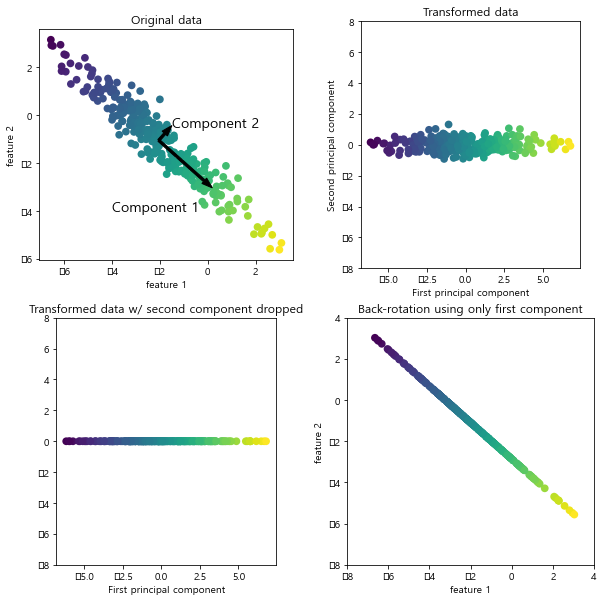

In [2]:
# Unsupervised learning
# 주성분 분석 : PCA
mglearn.plots.plot_pca_illustration()
# Component 1 : 주성분
# 2번째 그래프는 1번째 그래프를 0 중심으로 전환(2차원)
# 2번째 그래프의 점을 모두 직선에 붙여서 1차원으로 만든게 3번째 그래프(1차원)
# 2차원을 1차원으로 변환하는게 차원 축소

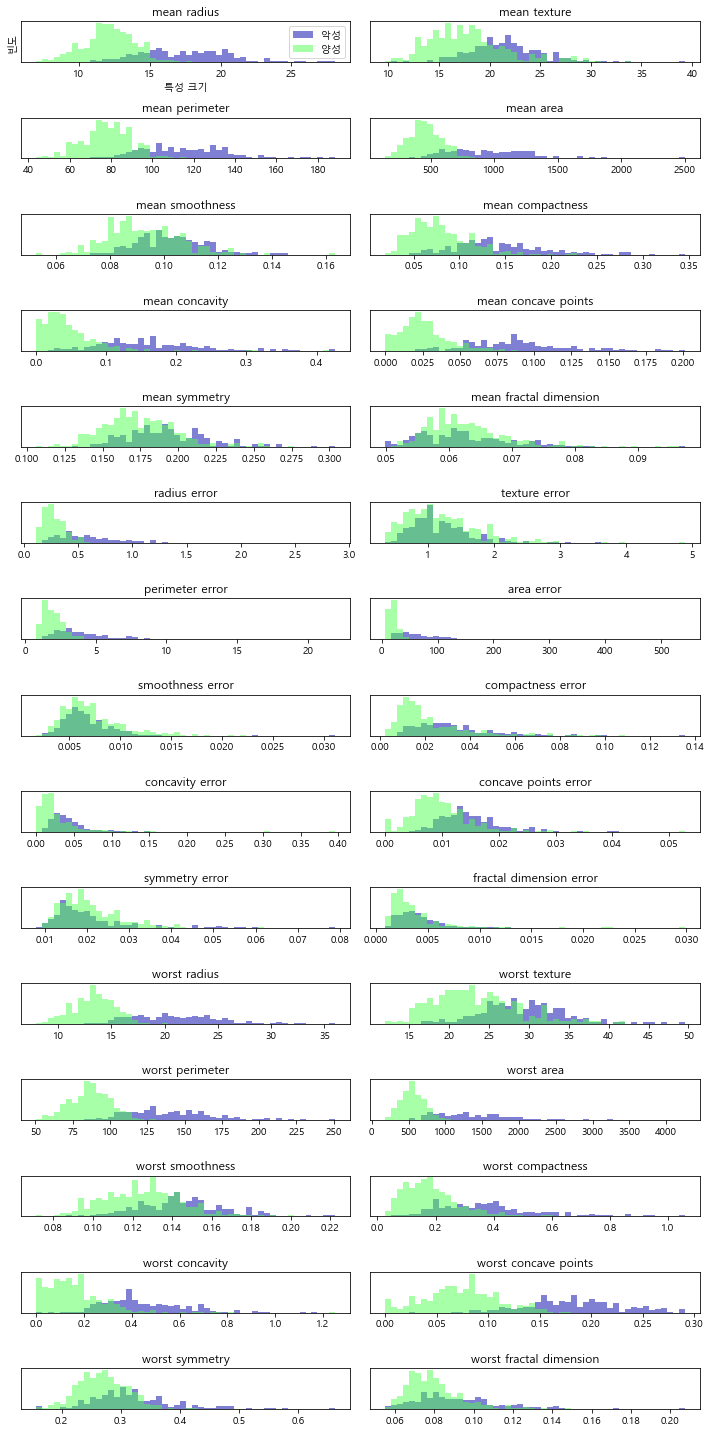

In [3]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
fig, axes = plt.subplots(15, 2, figsize=(10,20))
maligant = cancer.data[cancer.target == 0] # 악성
benign = cancer.data[cancer.target == 1] # 양성

ax = axes.ravel() # 다차원 배열을 1차원 배열로 변환, 밑에는 예시
# x = np.array([[1, 2, 3], [4, 5, 6]])
# np.ravel(x)
# array([1, 2, 3, 4, 5, 6])

for i in range(30): # 0 - 29
    _, bins = np.histogram(cancer.data[:, i], bins=50) #cancer.data의 모든 행에 i번째 열을 bins=50 히스토그램으로 그림.
    ax[i].hist(maligant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:,i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("특성 크기")
ax[0].set_ylabel("빈도")
ax[0].legend(["악성", "양성"], loc="best") # loc는 범례 위치를 지정하는 것인데 best로 설정하면 스스로 알아서 배치 됨.
fig.tight_layout()

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
cancer = load_breast_cancer()

# MinMaxScaler and Standard Scaler
# MinMaxScaler : (0.1), (1.0) 사이에 데이터를 스케일링
# StandardScaler : avg 0, std 1로 해서 데이터를 스케일링(Z-분포랑 원리 같음)
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data) # z = (x - u) / s, u : avg, s : std

from sklearn.decomposition import PCA
pca = PCA(n_components=2) # 기존 col를 분석해서 2개의 col로 변환함(차원축소)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
print("original data form:", str(X_scaled.shape))
print("abstracted data form:", str(X_pca.shape))

original data form: (569, 30)
abstracted data form: (569, 2)


In [5]:
X_pca

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

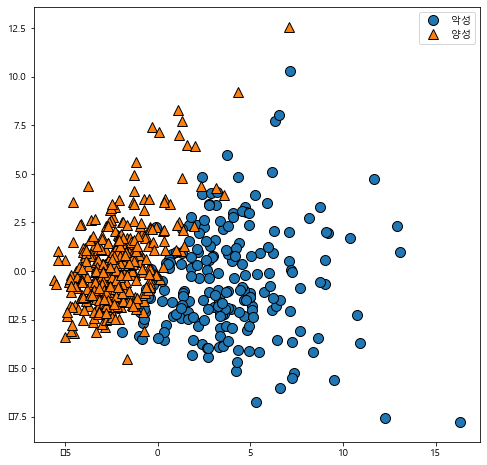

In [6]:
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0], X_pca[:,1], cancer.target)
plt.legend(["악성", "양성"], loc="best")
plt.show()
# 실제 데이터에서 x만 존재하고 y가 없을 때는 사람이 구분해야 된다.

In [7]:
print("PCA 주성분 통제:", pca.components_.shape)

PCA 주성분 통제: (2, 30)


In [8]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

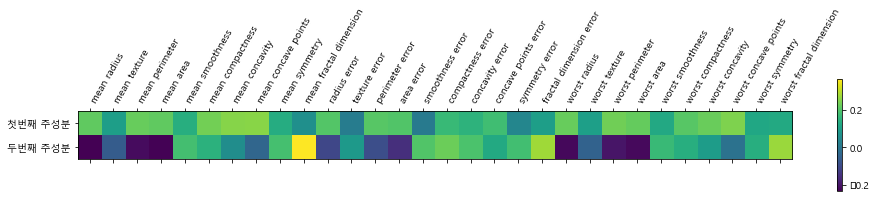

In [9]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0,1], ["첫번째 주성분", "두번째 주성분"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')
plt.show()

In [10]:
# t-SNE : 차원 축소, 시각화
from sklearn.datasets import load_digits
digits =load_digits()

digits.data.shape, digits.target.shape
# y col이 64인데 digits의 크기가 8 x 8에서 행에 8개씩 빼서 64에 순차적으로 넣음

((1797, 64), (1797,))

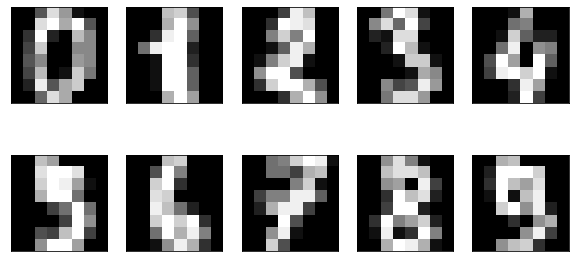

In [11]:
fig, axes = plt.subplots(2, 5, figsize=(10,5), subplot_kw={'xticks':(), 'yticks':()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img, cmap='gray') # cmap : colormap

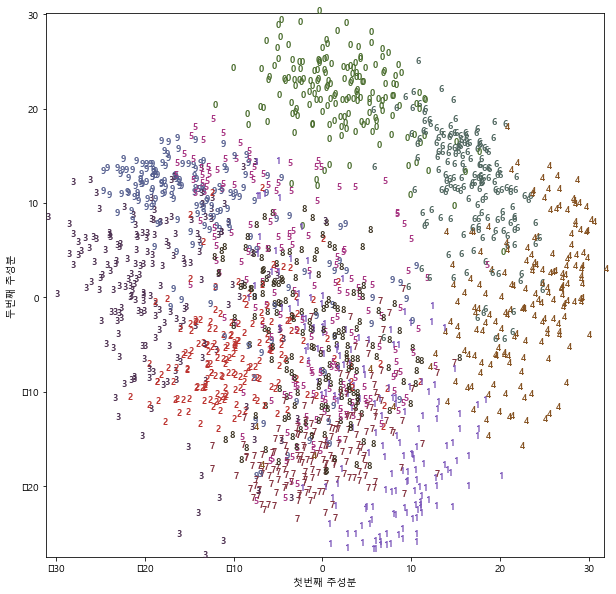

In [12]:
# unsupervised learning은 단지 참고용이지 UL에서 정답 y를 뽑아낼 수 없다.
pca = PCA(n_components=2)
pca.fit(digits.data)
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
         "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10,10))
plt.xlim(digits_pca[:,0].min(), digits_pca[:,0].max())
plt.ylim(digits_pca[:,1].min(), digits_pca[:,1].max())
for i in range(len(digits.data)):
    plt.text(digits_pca[i,0], digits_pca[i,1], str(digits.target[i]),
            color=colors[digits.target[i]],
            fontdict={"weight":'bold', 'size':9})
plt.xlabel("첫번째 주성분")
plt.ylabel("두번째 주성분")
plt.show()
# 정답을 알기 때문에 아래처럼 분류할 수 있지만 정답을 모르면 분류하기가 어렵다.
# 주성분 분석을 한다고해서 y 값을 찾아낼 수 있는게 아니다. 단지 알고리즘이 생각하기에 중요하다고 생각하는 주성분을 추출하는 것이다.

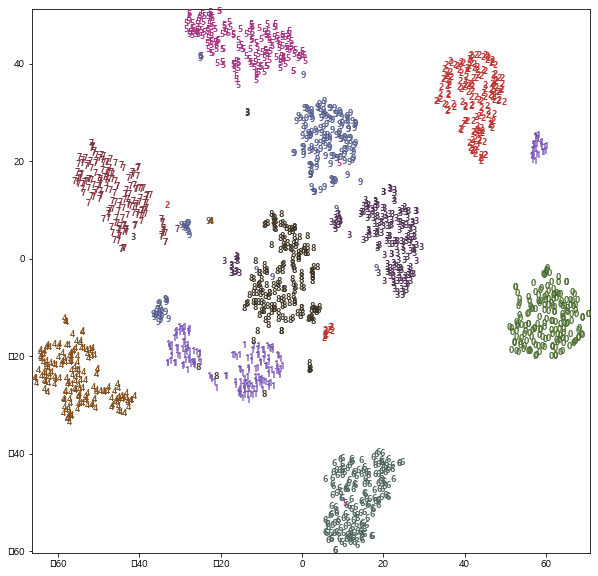

In [13]:
# Unsupervised Learning : TSNE
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
digits_tsne = tsne.fit_transform(digits.data)
plt.figure(figsize=(10,10))
plt.xlim(digits_tsne[:,0].min(), digits_tsne[:,0].max()+1)
plt.ylim(digits_tsne[:,1].min(), digits_tsne[:,1].max()+1)
for i in range(len(digits.data)):
    plt.text(digits_tsne[i,0], digits_tsne[i,1], str(digits.target[i]), color=colors[digits.target[i]], fontdict={"weight":"bold","size":9})
plt.show()
# 클래스 레이블 정보를 사용하지 않았지만, 모든 클래스가 확실히 구분되었음을 볼 수 있다.

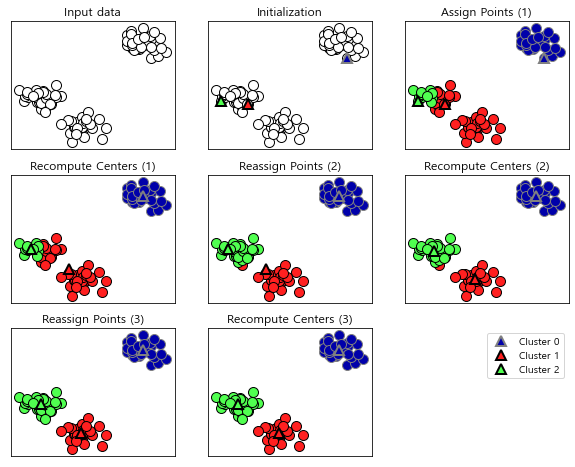

In [14]:
# K-means clustering
# 데이터 포인트를 가장 가까운 클러스터 중심에 할당하고, 그런 다음 클러스터에 할당된 데이터 포인트의 평균으로 클러스터 중심을 다시 지정
mglearn.plots.plot_kmeans_algorithm()

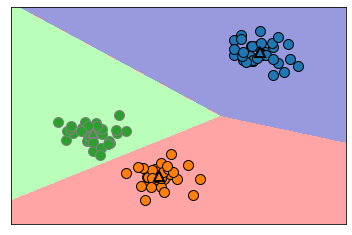

In [15]:
mglearn.plots.plot_kmeans_boundaries()

In [16]:
# Classification : SL, Clustering : UL
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
X, y = make_blobs(random_state=1)

# X : x,y 좌표, y : 분류 정답
kmeans = KMeans(n_clusters=3)
kmeans.fit(X) # 비지도학습이라서 y가 없다.

KMeans(n_clusters=3)

In [17]:
y # 정답 데이터

array([0, 1, 1, 1, 2, 2, 2, 1, 0, 0, 1, 1, 2, 0, 2, 2, 2, 0, 1, 1, 2, 1,
       2, 0, 1, 2, 2, 0, 0, 2, 0, 0, 2, 0, 1, 2, 1, 1, 1, 2, 2, 1, 0, 1,
       1, 2, 0, 0, 0, 0, 1, 2, 2, 2, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 1, 2,
       0, 2, 0, 1, 1, 1, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 1, 2, 0, 0, 0, 0,
       1, 0, 2, 0, 0, 1, 1, 2, 2, 0, 2, 0])

In [18]:
print(kmeans.predict(X)) # K-mean clustering이 예측한 정답

[0 1 1 1 2 2 2 1 0 0 1 1 2 0 2 2 2 0 1 1 2 1 2 0 1 2 2 0 0 2 0 0 2 0 1 2 1
 1 1 2 2 1 0 1 1 2 0 0 0 0 1 2 2 2 0 2 1 1 0 0 1 2 2 1 1 2 0 2 0 1 1 1 2 0
 0 1 2 2 0 1 0 1 1 2 0 0 0 0 1 0 2 0 0 1 1 2 2 0 2 0]


In [19]:
print(kmeans.labels_) # K-mean clustering이 예측한 정답

[0 1 1 1 2 2 2 1 0 0 1 1 2 0 2 2 2 0 1 1 2 1 2 0 1 2 2 0 0 2 0 0 2 0 1 2 1
 1 1 2 2 1 0 1 1 2 0 0 0 0 1 2 2 2 0 2 1 1 0 0 1 2 2 1 1 2 0 2 0 1 1 1 2 0
 0 1 2 2 0 1 0 1 1 2 0 0 0 0 1 0 2 0 0 1 1 2 2 0 2 0]


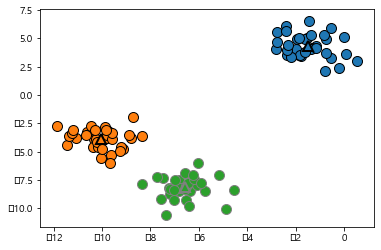

In [20]:
mglearn.discrete_scatter(X[:,0], X[:,1], kmeans.labels_, markers="o")
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], [0,1,2], markers="^", markeredgewidth=2)
plt.show()
# K-means cluster에 중심을 삼각형으로 표시

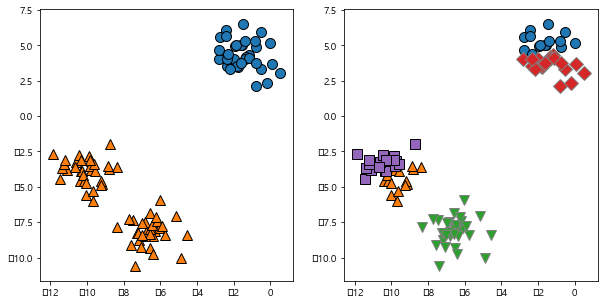

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignment = kmeans.labels_
mglearn.discrete_scatter(X[:,0], X[:,1], assignment, ax=axes[0])

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignment = kmeans.labels_
mglearn.discrete_scatter(X[:,0], X[:,1], assignment, ax=axes[1])
plt.show()
#왼쪽 그래프는 2개의 cluster로 나눈 경우, 오른쪽 그래프는 5개의 cluster로 나눈 경우

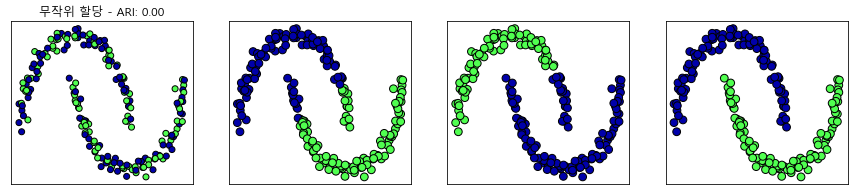

In [22]:
#KMeans vs. AgglomerativeClustering vs. DBSCAN
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
fig, axes = plt.subplots(1, 4, figsize=(15,3), subplot_kw={"xticks":(), "yticks":()})
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))
axes[0].set_title("무작위 할당 - ARI: {:.2f}".format(adjusted_rand_score(y, random_clusters)))
axes[0].scatter(X_scaled[:,0], X_scaled[:,1], c=random_clusters, cmap=mglearn.cm3, edgecolors='black')

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters, cmap=mglearn.cm3, s=60, edgecolors='black')
    ax.set_title=("{} - API: {:.2f}").format(algorithm.__class__.__name__, adjusted_rand_score(y, clusters))
plt.show()


In [23]:
# 데이터 표현과 특성 공학
names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
        'marital-status', 'occupation', 'relationship', 'race', 'gender',
        'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
df = pd.read_csv('../datasets/adult.data', header=None, index_col=False,
                  names=names)
df


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [24]:
data = df[['age','workclass','education','gender','hours-per-week',
          'occupation','income']]
data

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K
...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Female,38,Tech-support,<=50K
32557,40,Private,HS-grad,Male,40,Machine-op-inspct,>50K
32558,58,Private,HS-grad,Female,40,Adm-clerical,<=50K
32559,22,Private,HS-grad,Male,20,Adm-clerical,<=50K


In [25]:
data.gender.value_counts()

 Male      21790
 Female    10771
Name: gender, dtype: int64

In [26]:
print("원본 특성:\n", list(data.columns), "\n")
data_dummies = pd.get_dummies(data)
print("get_dummies 후의 특성:\n", list(data_dummies.columns))

원본 특성:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

get_dummies 후의 특성:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ 

In [27]:
data_dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [28]:
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']

In [29]:
X = features.values

In [30]:
y = data_dummies['income_ >50K'].values
X.shape, y.shape

((32561, 44), (32561,))

In [31]:
# 모델 생성 ==> 모델 훈련 ==> 모델 평가
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("test accuracy: {:.2f}".format(logreg.score(X_test, y_test)))

test accuracy: 0.81


In [32]:
# Scikit-learn에서 범주형 데이터 다루기 : OneHotEncoder, ColumnTransformer
demo_df = pd.DataFrame({"num feature":[0,1,2,1], "categorical feature":["양말", "여우", "양말", "상자"]})
demo_df

,num feature,categorical feature
0,0,양말
1,1,여우
2,2,양말
3,1,상자


In [33]:
pd.get_dummies(demo_df)

,num feature,categorical feature_상자,categorical feature_양말,categorical feature_여우
0,0,0,1,0
1,1,0,0,1
2,2,0,1,0
3,1,1,0,0


In [34]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse = False) # sparse=False : numpy array return
print(ohe.fit_transform(demo_df))

[[1. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0.]]


In [35]:
data.head()

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer(
[("scaling",StandardScaler(), ['age', 'hours-per-week']), ('onehot', OneHotEncoder(sparse=False), ['workclass', 'education', 'gender', 'occupation'])])

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
data_features = data.drop("income", axis=1)
data_features

,age,workclass,education,gender,hours-per-week,occupation
0,39,State-gov,Bachelors,Male,40,Adm-clerical
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial
2,38,Private,HS-grad,Male,40,Handlers-cleaners
3,53,Private,11th,Male,40,Handlers-cleaners
4,28,Private,Bachelors,Female,40,Prof-specialty
...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Female,38,Tech-support
32557,40,Private,HS-grad,Male,40,Machine-op-inspct
32558,58,Private,HS-grad,Female,40,Adm-clerical
32559,22,Private,HS-grad,Male,20,Adm-clerical


In [38]:
X_train, X_test, y_train, y_test = train_test_split(data_features, data['income'], random_state=0)
ct.fit(X_train)

ColumnTransformer(transformers=[('scaling', StandardScaler(),
                                 ['age', 'hours-per-week']),
                                ('onehot', OneHotEncoder(sparse=False),
                                 ['workclass', 'education', 'gender',
                                  'occupation'])])

In [39]:
X_train_trans = ct.transform(X_train)
X_train_trans.shape

(24420, 44)

In [40]:
logreg = LogisticRegression()
logreg.fit(X_train_trans, y_train)

LogisticRegression()

In [41]:
X_test_trans = ct.transform(X_test)
print("test acc: {:.2f}%".format(logreg.score(X_test_trans, y_test)))

test acc: 0.81%


In [42]:
# make_column_transformer use
from sklearn.compose import make_column_transformer
ct = make_column_transformer(
(StandardScaler(), ['age', 'hours-per-week']), (OneHotEncoder(sparse=False), ['workclass', 'education', 'gender', 'occupation']))
ct

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['age', 'hours-per-week']),
                                ('onehotencoder', OneHotEncoder(sparse=False),
                                 ['workclass', 'education', 'gender',
                                  'occupation'])])

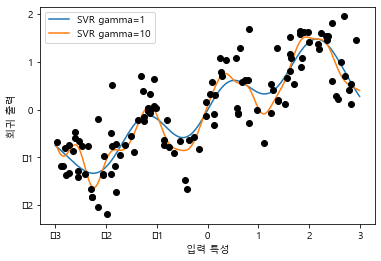

In [43]:
# SVR 실습
X, y = mglearn.datasets.make_wave(n_samples=120)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
from sklearn.svm import SVR
for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X,y)
    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))
plt.plot(X[:,0], y, 'o', c='k')
plt.xlabel("입력 특성")
plt.ylabel("회귀 출력")
plt.legend(loc="best")
plt.show()

In [44]:
# 모델 평가와 성능 향상
# Cross validation
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X, y = make_blobs(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression().fit(X_train, y_train)
print("test acc: {:.2f}%".format(logreg.score(X_test, y_test)*100))


test acc: 88.00%


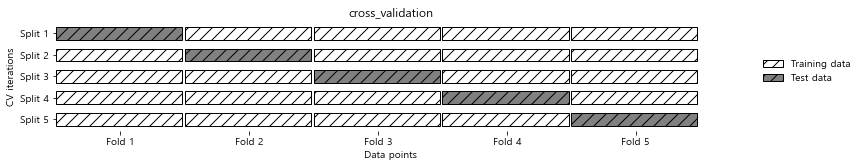

In [45]:
mglearn.plots.plot_cross_validation()

In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
iris = load_iris()
logreg = LogisticRegression()
scores = cross_val_score(logreg, iris.data, iris.target)
print("교차 검증 점수:", scores)
# 1. 은 overfitting
# 1번째하고 4번째가 좋은 결과이다.

교차 검증 점수: [0.96666667 1.         0.93333333 0.96666667 1.        ]


In [47]:
# default split의 개수는 5개, cv로 설정할 수 있다.
scores = cross_val_score(logreg, iris.data, iris.target, cv=7)
print("교차 검증 점수:", scores)

교차 검증 점수: [0.95454545 1.         0.90909091 0.95238095 0.95238095 1.
 1.        ]


In [48]:
print("교차 검증 평균:", scores.mean())

교차 검증 평균: 0.9669140383426098


In [49]:
from sklearn.model_selection import cross_validate
res = cross_validate(logreg, iris.data, iris.target, cv=5, return_train_score=True)
res

{'fit_time': array([0.02498674, 0.02056646, 0.01695466, 0.01802802, 0.01562357]),
 'score_time': array([0., 0., 0., 0., 0.]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.96666667, 0.96666667, 0.98333333, 0.98333333, 0.975     ])}

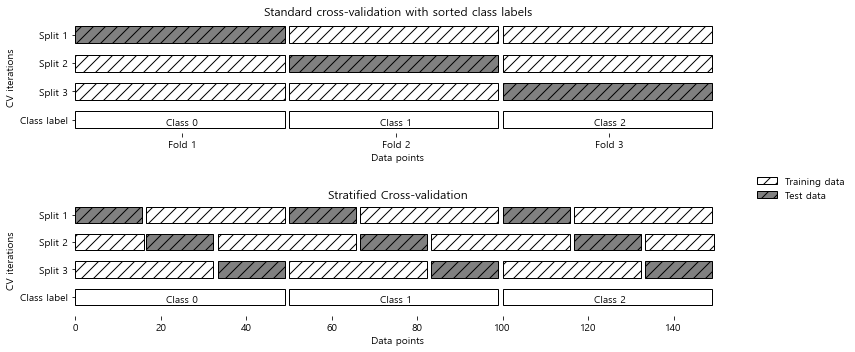

In [50]:
mglearn.plots.plot_stratified_cross_validation()

In [51]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)
cross_val_score(logreg, iris.data, iris.target, cv=kfold)

array([1.        , 1.        , 0.86666667, 0.93333333, 0.83333333])

In [52]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("교차 검증 분할 수:", len(scores))
print("평균 정확도: {:.2f}%".format(scores.mean()*100))

교차 검증 분할 수: 150
평균 정확도: 96.67%


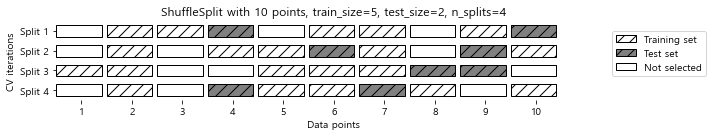

In [53]:
mglearn.plots.plot_shuffle_split()

In [54]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
scores

array([0.92      , 0.96      , 0.92      , 0.97333333, 0.98666667,
       0.96      , 0.96      , 0.97333333, 0.96      , 0.96      ])

In [55]:
# Grid Search
# hyperparameters tunnig 하는 법
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svc = SVC(gamma=gamma, C=C)
        svc.fit(X_train, y_train)
        score = svc.score(X_test, y_test)
        if score > best_score:
            best_score = score
            best_parameters = {"C":C, "gamma":gamma}
print("best score: {:.2f}".format(best_score*100))
print("best parameters:", best_parameters)

best score: 97.37
best parameters: {'C': 100, 'gamma': 0.001}


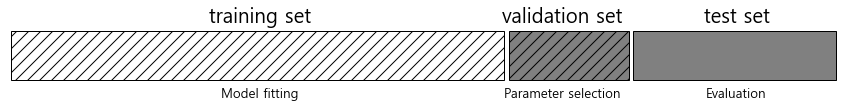

In [56]:
mglearn.plots.plot_threefold_split()
# 훈련 시 validation set으로 검증
# 훈련이 끝나고 테스트할 때 test set 사용

In [57]:
# training set, validation set, test set
# 1. training set과 test set으로 나눈다.
# 2. training set을 사용해서 validation set을 나눈다.
from sklearn.svm import SVC
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)
print(X_train.shape, X_valid.shape, X_test.shape)

(84, 4) (28, 4) (38, 4)


In [58]:
# x axis = C, y axis = gamma
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svc = SVC(gamma=gamma, C=C)
        svc.fit(X_train, y_train)
        score = svc.score(X_valid, y_valid)
        if score > best_score:
            best_score = score
            best_parameters = {"C":C, "gamma":gamma}
svm = SVC(**best_parameters) # ** 의미는 parameters을 가지고 object를 생성하겠다는 의미
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("검증 최고 점수: {:.2f}%".format(best_score*100))
print("best parameters:", best_parameters)
print("best parameters test acc: {:.2f}%".format(test_score*100))

검증 최고 점수: 96.43%
best parameters: {'C': 10, 'gamma': 0.001}
best parameters test acc: 92.11%


In [59]:
# Grid search using cross-validation
for gamma in [0.001, 0.01, 1, 10, 100]:
    for C in [0.001, 0.01, 1, 10, 100]:
        svc = SVC(gamma=gamma, C=C)
        scores = cross_val_score(svc, X_trainval, y_trainval, cv=5)
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_parameters = {"C":C, "gamma":gamma}
svc = SVC(**best_parameters)
svc.fit(X_trainval, y_trainval)
svc.score(X_test, y_test)

0.9736842105263158

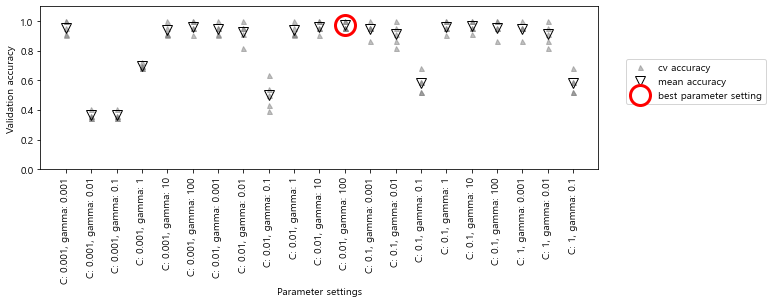

In [60]:
mglearn.plots.plot_cross_val_selection()

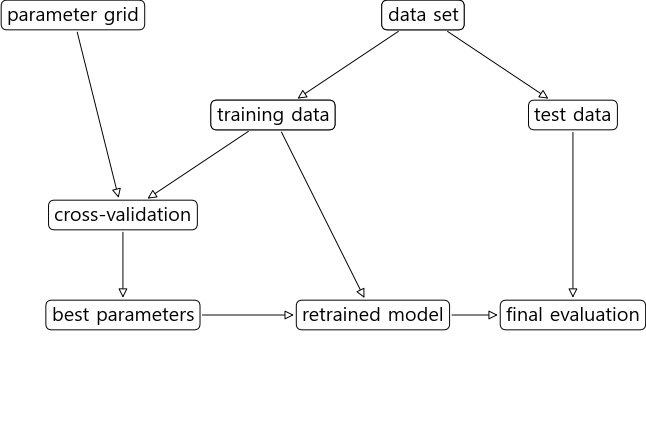

In [61]:
mglearn.plots.plot_grid_search_overview()

In [62]:
param_grid = {"C":[0.001, 0.01, 0.1, 1, 10, 100],
             "gamma":[0.001, 0.01, 0.1, 1, 10, 100]}
from sklearn.model_selection import GridSearchCV # GridSearchCV는 GridSearch를 하면서 cross-validation도 해준다.
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

grid_search.fit(X_train, y_train)

print("test acc: {:.2f}%".format(grid_search.score(X_test, y_test)*100))
print("best parameters:", grid_search.best_params_)
print("최고의 교차 검증 점수: {:.2f}".format(grid_search.best_score_ * 100))

test acc: 97.37%
best parameters: {'C': 10, 'gamma': 0.1}
최고의 교차 검증 점수: 97.31


In [63]:
results = pd.DataFrame(grid_search.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.000598,4.886166e-04,0.000200,0.000399,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
1,0.000399,4.881108e-04,0.000598,0.000488,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
2,0.000399,4.886944e-04,0.000039,0.000077,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
3,0.000000,0.000000e+00,0.000000,0.000000,0.001,1,"{'C': 0.001, 'gamma': 1}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
4,0.003125,6.249142e-03,0.000200,0.000400,0.001,10,"{'C': 0.001, 'gamma': 10}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
5,0.000797,3.986138e-04,0.000200,0.000399,0.001,100,"{'C': 0.001, 'gamma': 100}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
6,0.000399,4.886360e-04,0.000199,0.000399,0.01,0.001,"{'C': 0.01, 'gamma': 0.001}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
7,0.000598,4.886555e-04,0.000399,0.000489,0.01,0.01,"{'C': 0.01, 'gamma': 0.01}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
8,0.000598,4.883442e-04,0.000000,0.000000,0.01,0.1,"{'C': 0.01, 'gamma': 0.1}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
9,0.000599,4.888114e-04,0.000399,0.000489,0.01,1,"{'C': 0.01, 'gamma': 1}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581


In [64]:
np.transpose(results.head())

,0,1,2,3,4
mean_fit_time,0.000598431,0.00039854,0.000399017,0,0.00312457
std_fit_time,0.000488617,0.000488111,0.000488694,0,0.00624914
mean_score_time,0.000199652,0.000597954,3.86715e-05,0,0.000200176
std_score_time,0.000399303,0.000488231,7.7343e-05,0,0.000400352
param_C,0.001,0.001,0.001,0.001,0.001
param_gamma,0.001,0.01,0.1,1,10
params,"{'C': 0.001, 'gamma': 0.001}","{'C': 0.001, 'gamma': 0.01}","{'C': 0.001, 'gamma': 0.1}","{'C': 0.001, 'gamma': 1}","{'C': 0.001, 'gamma': 10}"
split0_test_score,0.347826,0.347826,0.347826,0.347826,0.347826
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826
split2_test_score,0.363636,0.363636,0.363636,0.363636,0.363636


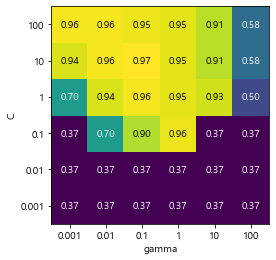

In [65]:
scores = np.array(results.mean_test_score).reshape(6,6)
mglearn.tools.heatmap(scores, xlabel="gamma", xticklabels=param_grid['gamma'], ylabel="C", yticklabels=param_grid['C'], cmap='viridis')
plt.show()
# gamma : 0.1, C : 10 인 0.97이 제일 좋다.